## Preprocessing

In [36]:
pip install keras-tuner

In [37]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [38]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
dropped_app_data = application_df.drop(["EIN", "NAME"], axis=1)
dropped_app_data.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [39]:
# Determine the number of unique values in each column.
dropped_app_data.nunique()

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [40]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_counts = dropped_app_data["APPLICATION_TYPE"].value_counts()
application_counts

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [41]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#increased cutoff from 1000 to 2000
cutoff_value = 2000
application_types_to_replace = application_counts[application_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    dropped_app_data['APPLICATION_TYPE'] = dropped_app_data['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [42]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = dropped_app_data["CLASSIFICATION"].value_counts()
classification_counts

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [43]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_greater_than_1 = classification_counts[classification_counts > 1]
classification_counts_greater_than_1

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [44]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#increased cutoff value from 2,000 to 4,000
cutoff_value = 4000
classifications_to_replace = classification_counts[classification_counts < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
Other,6062
C1200,4837


In [45]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(dropped_app_data, drop_first=True)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T3,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,True,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,True,False,True,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False


In [46]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [47]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Optimizing the model

In [58]:
def create_model(hp):
    """
    Creates a Keras model with hyperparameter tuning.

    Args:
        hp: HyperParameters object

    Returns:
        A compiled Keras model.
    """
    number_input_features = len(X_train_scaled[0])  # Access X_train_scaled from outer scope
    nn = tf.keras.models.Sequential()

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=8, max_value=250, step=8)
    nn.add(tf.keras.layers.Dense(units=hp_units, input_dim=number_input_features, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))

    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=8, max_value=250, step=8)
    nn.add(tf.keras.layers.Dense(units=hp_units2, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))

    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid", kernel_initializer=tf.keras.initializers.VarianceScaling()))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return nn

# Now you can call kt.Hyperband with the create_model function
tuner = kt.Hyperband(create_model, objective="val_accuracy", max_epochs=20, hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [59]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train,epochs=20,validation_data=(X_test_scaled, y_test))

In [60]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'units': 48,
 'units2': 32,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

## Compile, Train and Evaluate the Model

In [61]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 48
hidden_nodes_layer2 = 32
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid", kernel_initializer=tf.keras.initializers.VarianceScaling()))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 48)                  │           4,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,809 (26.60 KB)

 Trainable params: 6,809 (26.60 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Compile the model
nn_model = nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
# Train the model
nn_fit = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6566 - loss: 0.6235
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7107 - loss: 0.5774
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7120 - loss: 0.5726
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7155 - loss: 0.5706
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7108 - loss: 0.5746
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7171 - loss: 0.5668
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7174 - loss: 0.5715
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7214 - loss: 0.5660
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7163 - loss: 0.5692
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7229 - loss: 0.5640
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7181 - loss: 0.5647
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

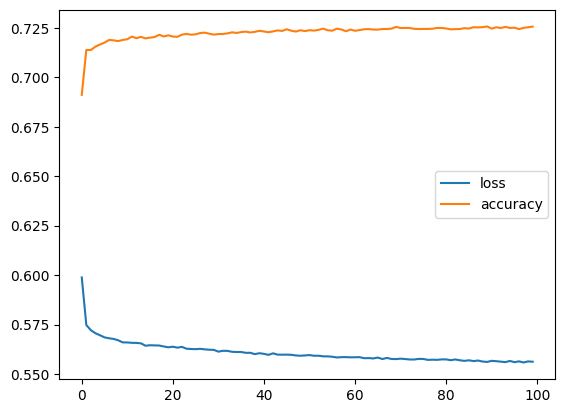

In [64]:
#Plot the graph of the fit_model
history_df = pd.DataFrame(nn_fit.history)
history_df.loc[:, ["loss", "accuracy"]].plot()

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7093 - loss: 0.5969
Loss: 0.5968902707099915, Accuracy: 0.7092711329460144


In [66]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")